<IPython.core.display.Javascript object>


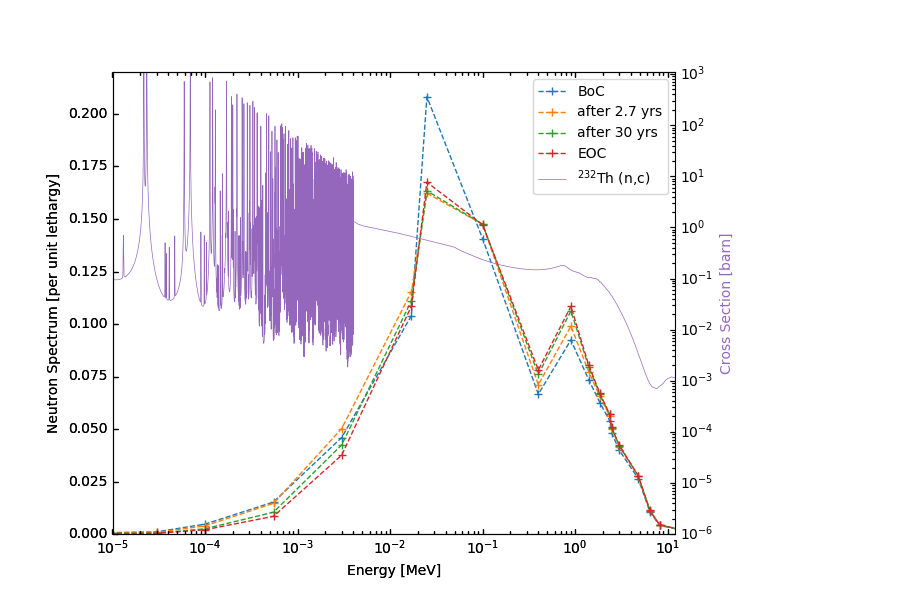

In [6]:
%matplotlib notebook 
# Import modules
import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
from pyne import serpent
from pyne import nucname
from scipy.stats.stats import pearsonr 
import scipy.integrate as inte
from sklearn.metrics import mean_squared_error
from math import sqrt
import itertools

# SCALE output 
xs_file     = '/home/andrei2/Desktop/ornl/msfr/plots/th232_capture_xs.txt'
filename    = '/home/andrei2/Desktop/ornl/msfr/scale/th_feed_60yrs/boc_spectrum.out'
filename33  = '/home/andrei2/Desktop/ornl/msfr/scale/th_feed_60yrs/33_cycles_spectrum.out'
filename30y = '/home/andrei2/Desktop/ornl/msfr/scale/th_feed_60yrs/30_yrs_spectrum.out'
filename60y = '/home/andrei2/Desktop/ornl/msfr/scale/th_feed_60yrs/eoc_spectrum.out'
start = "No    Energy(eV)   Flux       Flux      Adj.Flux   Adj.Flux"
stop  = "NOTE: Flux values above are per unit-lethargy."
#spectrum_grid_eq = det10['DETavrg']
#spectrum_grid_I = det0['DET1']
#spectrum_grid_II = det0['DET2']
#energy = energy_grid[:,2]
#flux_spectrum = spectrum_grid[:,10]
#print list(det0.keys())
#print np.amax(spectrum_grid[:,10])
#print np.sum(spectrum_grid[:,10])
#print np.trapz(spectrum_grid[:,10],energy)
#y = spectrum_grid[:,10]/np.trapz(spectrum_grid[:,10],energy)

def read_scale_out (filename):
    upp_enrg = []
    flux_list = []
    with open(filename,'r') as infile:
        copy = False
        for line in infile:
            if line.strip() == start:
                copy = True
            elif line.strip() == stop:
                copy = False
            elif copy:
                p = line.strip().split()
                if p != []:
                    upp_enrg.append(float(p[1]))  
                    flux_list.append(float(p[2]))                
    u_en = 1e-6* np.flip (np.array (upp_enrg, dtype=float), 0 )               # Convert eV to MeV
    flux = np.flip ( np.array (flux_list, dtype=float), 0 )
    num_gr = len (u_en)
    return u_en, flux, num_gr

def read_xsdata (filename):
    energy       = []
    xsdata       = []
    with open(filename,'r') as infile:
        for line in itertools.islice(infile, 11, None):  # Skip file header start=6, stop=None
            p = line.split()
            energy.append(float(p[0]))
            xsdata.append(float(p[1]))
    energy_arr = np.array(energy, dtype=np.float32)
    xsdata_arr = np.array(xsdata, dtype=np.float32)
    return energy_arr, xsdata_arr

ene_grid_sc, neutron_flux_sc, num_groups   = read_scale_out (filename)
ene_grid_sc, neutron_flux_sc33, num_groups = read_scale_out (filename33)
ene_grid_sc, neutron_flux_sc30y, num_groups = read_scale_out (filename30y)
ene_grid_sc, neutron_flux_sc60y, num_groups = read_scale_out (filename60y)
ene_grid_xs, xsdata = read_xsdata (xs_file)
#print np.trapz((np.trapz(y,energy)/np.trapz(spectrum_p,energy_p))*spectrum_p,energy_p)
#print np.trapz(spectrum_grid_I[:,10]/np.trapz(spectrum_grid_I[:,10],energy_grid[:,2]),energy_grid[:,2])

# Initialize figure
plt.figure(figsize=[9,6])
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)
par1 = host.twinx()
par1.axis["right"].toggle(all=True)

host.set_xlim([1e-5, 12])
host.set_ylim([0, 0.22])
par1.set_ylim([1e-6, 1100])
host.set_xlabel('Energy [MeV]')
host.set_ylabel('Neutron Spectrum [per unit lethargy]')
par1.set_ylabel('Cross Section [barn]')
#ax.semilogx(ene_grid_sc, neutron_flux_sc33, '+--', label='after 33 cycles (2.7yrs)', color='red', linewidth=1)
p2, = host.semilogx(ene_grid_sc, neutron_flux_sc, '+--', label='BoC', linewidth=1)
p2, = host.semilogx(ene_grid_sc, neutron_flux_sc33, '+--', label='after 2.7 yrs', linewidth=1)
p2, = host.semilogx(ene_grid_sc, neutron_flux_sc30y, '+--', label='after 30 yrs', linewidth=1)
p2, = host.semilogx(ene_grid_sc, neutron_flux_sc60y, '+--', label='EOC', linewidth=1)
p1, = par1.loglog(ene_grid_xs, xsdata, '-', label='$^{232}$Th (n,c)', linewidth=0.5)
host.legend(loc=1)

#host.axis["left"].label.set_color(p2.get_color())
par1.axis["right"].label.set_color(p1.get_color())

plt.draw()
plt.show()
#plt.savefig('MSFR_spectrum_evo_vs_TH232.png',bbox_inches='tight', dpi=900)